In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import sklearn.model_selection as skm
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from ISLP.svm import plot as plot_svm
from matplotlib.pyplot import subplots, cm
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score



import seaborn as sns


In [2]:
data = pd.read_csv("/Users/zahra/Library/CloudStorage/OneDrive-SeattleUniversity/spring2024/ML2/SVM/Housing.csv")

In [3]:
data.shape
#we have 75388 data in 24 columns
data.describe()

,SERIAL,DENSITY,OWNERSHP,OWNERSHPD,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,HHINCOME,VALUEH,...,NFAMS,NCOUPLES,PERNUM,PERWT,AGE,MARST,BIRTHYR,EDUC,EDUCD,INCTOT
count,7.538800e+04,75388.000000,75388.000000,75388.000000,75388.000000,75388.000000,75388.000000,75388.000000,7.538800e+04,7.538800e+04,...,75388.000000,75388.000000,75388.000000,75388.000000,75388.000000,75388.000000,75388.000000,75388.000000,75388.000000,7.538800e+04
mean,1.387234e+06,2423.430017,1.266050,15.152146,2155.588184,6532.804850,3282.154680,9132.200363,1.325857e+05,3.115290e+06,...,1.120138,0.772722,2.133072,100.746644,41.737040,3.466599,1979.262960,6.553802,67.954754,1.741325e+06
std,8.903828e+03,2526.581859,0.441894,4.114694,1918.598151,4379.021441,3968.876334,2704.300467,1.300609e+05,4.178808e+06,...,0.520437,0.466072,1.347956,79.428151,23.497059,2.323782,23.497059,3.368158,33.507170,3.730804e+06
min,1.371772e+06,22.500000,1.000000,12.000000,48.000000,48.000000,4.000000,4.000000,-7.100000e+03,1.000000e+03,...,1.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1928.000000,0.000000,1.000000,-8.700000e+03
25%,1.379509e+06,448.200000,1.000000,13.000000,1080.000000,1200.000000,500.000000,9993.000000,5.500000e+04,4.000000e+05,...,1.000000,1.000000,1.000000,54.000000,22.000000,1.000000,1960.000000,6.000000,61.000000,1.560000e+04
50%,1.387292e+06,1667.900000,1.000000,13.000000,1680.000000,9992.000000,1200.000000,9993.000000,1.000000e+05,6.500000e+05,...,1.000000,1.000000,2.000000,80.000000,42.000000,4.000000,1979.000000,7.000000,71.000000,4.800000e+04
75%,1.394971e+06,3843.300000,2.000000,22.000000,2400.000000,9993.000000,9993.000000,9993.000000,1.640000e+05,9.999999e+06,...,1.000000,1.000000,3.000000,117.000000,61.000000,6.000000,1999.000000,10.000000,101.000000,1.250000e+05
max,1.402573e+06,13284.600000,2.000000,22.000000,9997.000000,9997.000000,9997.000000,9997.000000,1.674500e+06,9.999999e+06,...,13.000000,3.000000,16.000000,1113.000000,93.000000,6.000000,2021.000000,11.000000,116.000000,9.999999e+06


In [4]:
data.columns

Index(['SERIAL', 'DENSITY', 'OWNERSHP', 'OWNERSHPD', 'COSTELEC', 'COSTGAS',
       'COSTWATR', 'COSTFUEL', 'HHINCOME', 'VALUEH', 'ROOMS', 'BUILTYR2',
       'BEDROOMS', 'VEHICLES', 'NFAMS', 'NCOUPLES', 'PERNUM', 'PERWT', 'AGE',
       'MARST', 'BIRTHYR', 'EDUC', 'EDUCD', 'INCTOT'],
      dtype='object')

In [5]:
data = data.drop(['OWNERSHPD','COSTFUEL','BIRTHYR','NFAMS','NCOUPLES', 'NFAMS', 'PERNUM','PERWT', 'EDUCD', 'INCTOT', 'VALUEH', 'COSTWATR', 'COSTGAS','COSTELEC'], axis=1)

In [6]:
data.columns
data.shape

(75388, 11)

In [7]:
conditions = (
    (data['OWNERSHP'] != 0) &
    (data['ROOMS'] != 00) &
    (data['BEDROOMS'] != 00) &
    (~data['EDUC'].isin([00, 99])) &
    (data['BUILTYR2'] != 00) &
    (data['MARST'] != 9)&
    (~data['VEHICLES'].isin([0,9]))&
    (~data['AGE'].isin([999]))
    #(~data['COSTWATR'].isin([9993, 9997]))&
    #(~data['COSTELEC'].isin([9993, 9997]))&
    #(~data['COSTGAS'].isin([9993, 9997]))

)

'''when trying to get rid of the missing values or the NA for the value of the house variable
causing the variable ownership to loose its 2 value therefore we can sate that when there is missing in the vaLUE OF THE House,its rented'''

# Apply filtering
data = data[conditions]

In [8]:
data.shape
data.head()

,SERIAL,DENSITY,OWNERSHP,HHINCOME,ROOMS,BUILTYR2,BEDROOMS,VEHICLES,AGE,MARST,EDUC
0,1371772,920.0,1,75000,7,7,4,2,52,6,7
1,1371773,3640.9,2,13600,6,4,4,2,22,6,10
2,1371773,3640.9,2,13600,6,4,4,2,22,6,7
3,1371774,22.5,1,7000,5,5,4,2,62,4,6
4,1371775,3710.4,2,50500,4,6,3,2,50,3,7


In [9]:
data['MARST'] = data['MARST'].replace({1: 'Married', 2: 'Married', 3: 'Divorced', 4: 'Divorced', 5:'Single', 6: 'Single'})
data = pd.get_dummies(data, columns=['MARST'])
data.columns

Index(['SERIAL', 'DENSITY', 'OWNERSHP', 'HHINCOME', 'ROOMS', 'BUILTYR2',
       'BEDROOMS', 'VEHICLES', 'AGE', 'EDUC', 'MARST_Divorced',
       'MARST_Married', 'MARST_Single'],
      dtype='object')

In [10]:
data = data.sort_values(['SERIAL', 'AGE'], ascending=[True, False]).drop_duplicates('SERIAL')
data.shape

(28955, 13)

In [11]:
data.isna().sum()
data=data.drop(['SERIAL'], axis=1)
data.OWNERSHP.unique()

array([1, 2])

In [12]:
print(data.head())

   DENSITY  OWNERSHP  HHINCOME  ROOMS  BUILTYR2  BEDROOMS  VEHICLES  AGE  \
0    920.0         1     75000      7         7         4         2   52   
1   3640.9         2     13600      6         4         4         2   22   
3     22.5         1      7000      5         5         4         2   62   
4   3710.4         2     50500      4         6         3         2   50   
7    448.2         1    155300      5         6         4         2   93   

   EDUC  MARST_Divorced  MARST_Married  MARST_Single  
0     7               0              0             1  
1    10               0              0             1  
3     6               1              0             0  
4     7               1              0             0  
7    10               0              1             0  


In [13]:
X = data.drop(['OWNERSHP'], axis =1 )

y = data['OWNERSHP']
#spliting the data into train and test
X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size = 0.7, test_size = 0.3
                                                 ,random_state = 1)

In [14]:
scaler = StandardScaler().fit(X_train)
X_trainScaled = scaler.transform(X_train)
X_testScaled = scaler.transform(X_test)

In [15]:
n_components = range(1, 12)

# Initialize variables to store the best accuracy and corresponding n_components
best_accuracy = 0
best_n_components = None

# Iterate over each value of n_components
for n in n_components:
    # Apply PCA for feature selection
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_trainScaled)
    X_test_pca = pca.transform(X_testScaled)
    
    # Train SVM classifier
    svm_classifier = SVC(kernel='linear',C=10, cache_size=1000, verbose=True, max_iter=1000, random_state=1)
    svm_classifier.fit(X_train_pca, y_train)
    
    # Make predictions on test data
    y_pred = svm_classifier.predict(X_test_pca)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) * 100
    
    # Update best accuracy and best_n_components if necessary
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_components = n

# Print the best n_components and corresponding accuracy
print("Best n_components:", best_n_components)
print("Best Accuracy:", best_accuracy)

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -18722.543259, rho = 1.672228
nSV = 1878, nBSV = 1870
Total nSV = 1878
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -12869.762303, rho = 1.188940
nSV = 1354, nBSV = 1262
Total nSV = 1354
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -8817.618452, rho = 1.825436
nSV = 1014, nBSV = 809
Total nSV = 1014
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -7632.238982, rho = 2.426387
nSV = 923, nBSV = 658
Total nSV = 923
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -5338.205874, rho = -0.153091
nSV = 754, nBSV = 399
Total nSV = 754
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4369.208118, rho = -0.075871
nSV = 733, nBSV = 285
Total nSV = 733
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finish

In [16]:
C_values = [0.01, 0.1, 1, 10, 100, 1000]

svm_mod= [(C, SVC(kernel='linear', C=C, cache_size=1000, verbose=True, max_iter=1000, random_state=123)
            .fit(X_train_pca, y_train)
            .score(X_test_pca, y_test) * 100)
           for C in C_values]

for C, accuracy in svm_mod:
    print("Cost value: %s, Accuracy: %.2f%%" % (C, accuracy))
#Cost value: 0.01, Accuracy: 88.45%

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -19.995045, rho = 0.186387
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -198.865258, rho = 1.081389
nSV = 1992, nBSV = 1987
Total nSV = 1992
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1244.690428, rho = 0.928004
nSV = 1450, nBSV = 1047
Total nSV = 1450
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2151.565007, rho = 0.297587
nSV = 786, nBSV = 68
Total nSV = 786
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3110.191897, rho = 0.623290
nSV = 766, nBSV = 4
Total nSV = 766
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -5846.601686, rho = 0.599317
nSV = 705, nBSV = 2
Total nSV = 705
Cost value: 0.01, Accuracy: 32.66%
Cost value: 0.1, Accuracy: 26.33%
Cost v

In [17]:

# Define the list of cost values
C_values = [0.01, 0.1, 1, 10, 100, 1000]

# Define the parameter grid for GridSearchCV
param_grid = {'C': C_values}

# Create an SVM classifier with linear kernel
svm_classifier = SVC(kernel='linear', cache_size=1000, verbose=True, max_iter=1000,random_state=1)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_pca, y_train)

# Get the best parameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_ * 100

# Print the best parameters and best accuracy
print("Best Parameters:", best_params)
print("Best Accuracy: %.2f%%" % best_accuracy)
#Best Parameters: {'C': 0.1}
#Best Accuracy: 88.92%

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -19.995705, rho = 0.160868
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -19.999795, rho = 0.012793
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -19.996658, rho = 0.136262
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -19.997049, rho = 0.096653
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -19.997824, rho = 0.169003
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -199.101404, rho = 1.504924
nSV = 1994, nBSV = 1987
Total nSV = 1994
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #

In [18]:
C_values = [0.01, 0.1, 1, 10, 100]

# Define the parameter grid for GridSearchCV
param_grid = {'C': C_values}

# Create an SVM classifier with linear kernel
svm_classifier = SVC(kernel='linear', cache_size=1000, verbose=True, max_iter=1000,random_state=123)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_trainScaled, y_train)

# Get the best parameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_ * 100

# Print the best parameters and best accuracy
print("Best Parameters:", best_params)
print("Best Accuracy: %.2f%%" % best_accuracy)
#Best Parameters: {'C': 0.1}
#Best Accuracy: 88.92%

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -19.995705, rho = 0.160868
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -19.999795, rho = 0.012793
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -19.996658, rho = 0.136262
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -19.997049, rho = 0.096653
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -19.997824, rho = 0.169003
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -199.101404, rho = 1.504924
nSV = 1994, nBSV = 1987
Total nSV = 1994
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #

In [19]:
svm_linear = SVC(C=1, kernel='linear',cache_size=1000, verbose=True, max_iter=1000, random_state=123)
svm_linear.fit(X_trainScaled, y_train)


kfold = skm.KFold(5, 
                  random_state=123,
                  shuffle=True)
grid = skm.GridSearchCV(svm_linear,
                        {'C':[0.01,0.1,1,5,10,100]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')



grid.fit(X_trainScaled, y_train)
grid.best_params_
grid.best_estimator_
best_params = grid.best_params_
best_accuracy = grid.best_score_ * 100

# Print the best parameters and best accuracy
print("Best Parameters:", best_params)
print("Best Accuracy: %.2f%%" % best_accuracy)

#Best Parameters: {'C': 0.1}
#Best Accuracy: 88.81%

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1244.690428, rho = 0.928004
nSV = 1450, nBSV = 1047
Total nSV = 1450
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -19.995508, rho = 0.147378
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -19.998115, rho = 0.095769
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -19.999791, rho = 0.029392
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -19.998186, rho = 0.095755
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -19.998795, rho = 0.076452
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, 

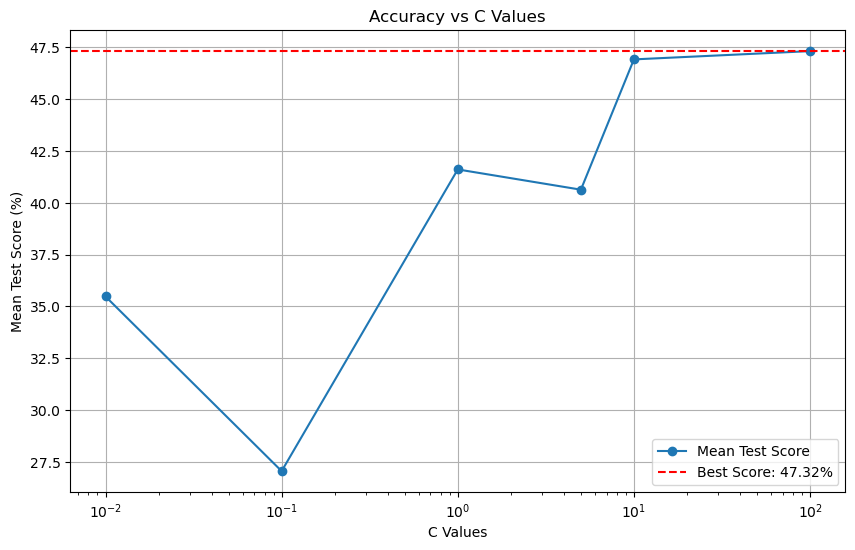

In [20]:



# Define C values and corresponding mean test scores from grid search
C_values = [0.01, 0.1, 1, 5, 10, 100]
mean_test_scores = grid.cv_results_['mean_test_score'] * 100
best_score = grid.best_score_ * 100

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(C_values, mean_test_scores, marker='o', linestyle='-', label='Mean Test Score')
plt.axhline(y=best_score, color='r', linestyle='--', label='Best Score: {:.2f}%'.format(best_score))
plt.title('Accuracy vs C Values')
plt.xlabel('C Values')
plt.ylabel('Mean Test Score (%)')
plt.xscale('log')  # Logarithmic scale for better visualization
plt.legend()
plt.grid(True)
plt.show()



In [21]:

# Initialize and train the SVM classifier
svm = SVC(kernel='linear', C=10, random_state=123)
svm.fit(X_trainScaled, y_train)

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=svm, n_features_to_select=10, step=1)
rfe.fit(X_trainScaled, y_train)

# Get selected features
selected_features = np.array(range(X_trainScaled.shape[1]))[rfe.support_]

# Extract feature names
selected_feature_names = X.columns[selected_features]

# Train SVM classifier with selected features
svm_selected = SVC(kernel='linear', C=10, random_state=42)
svm_selected.fit(X_trainScaled[:, selected_features], y_train)

# Evaluate the model on the testing data
accuracy = svm_selected.score(X_testScaled[:, selected_features], y_test)
print("Accuracy with selected features: {:.2f}%".format(accuracy * 100))

# Get the coefficients of the SVM model
svm_coef = svm_selected.coef_[0]

# Create a dictionary mapping feature names to their coefficients
feature_coef_map = {feature: coef for feature, coef in zip(selected_feature_names, svm_coef)}

# Sort the features based on their coefficients (importance)
sorted_features = sorted(feature_coef_map.items(), key=lambda x: x[1], reverse=True)

# Print important features in descending order of importance
print("Important Features:")
for feature, coef in sorted_features:
    print(f"{feature}: {coef}")

#the important features are printed and with the rfe the accuracy of the model with those selected features is presented to be 84.57%

Accuracy with selected features: 83.39%
Important Features:
DENSITY: 0.1759400390014596
BUILTYR2: 0.08615063752670338
MARST_Divorced: 0.010460792342789182
VEHICLES: -0.14250242280547598
MARST_Married: -0.17342782162580317
EDUC: -0.18550173648833623
ROOMS: -0.24698629199170496
HHINCOME: -0.2863465994972174
AGE: -0.5528017466049784
BEDROOMS: -0.5828962206254189


In [22]:
accuracy = svm.score(X_testScaled, y_test)
print(" Test Accuracy inital svm model with c=10: {:.2f}%".format(accuracy * 100))
accuracy = svm.score(X_trainScaled, y_train)
print(" Train Accuracy inital svm model with c=10: {:.2f}%".format(accuracy * 100))

 Test Accuracy inital svm model with c=10: 83.40%
 Train Accuracy inital svm model with c=10: 82.85%


Accuracy with selected features: 82.86%


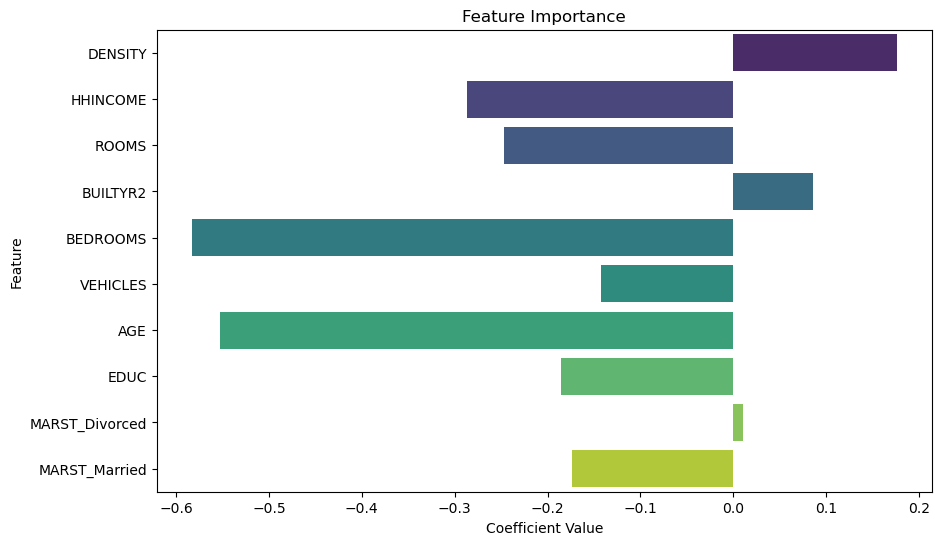

In [23]:
accuracy = svm_selected.score(X_trainScaled[:, selected_features], y_train)
print("Accuracy with selected features: {:.2f}%".format(accuracy * 100))
#the accuracy of the train and the test are close to one another and are high therefore we can conclude the model is performing well
plt.figure(figsize=(10, 6))
sns.barplot(x=svm_selected.coef_[0], y=selected_feature_names, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

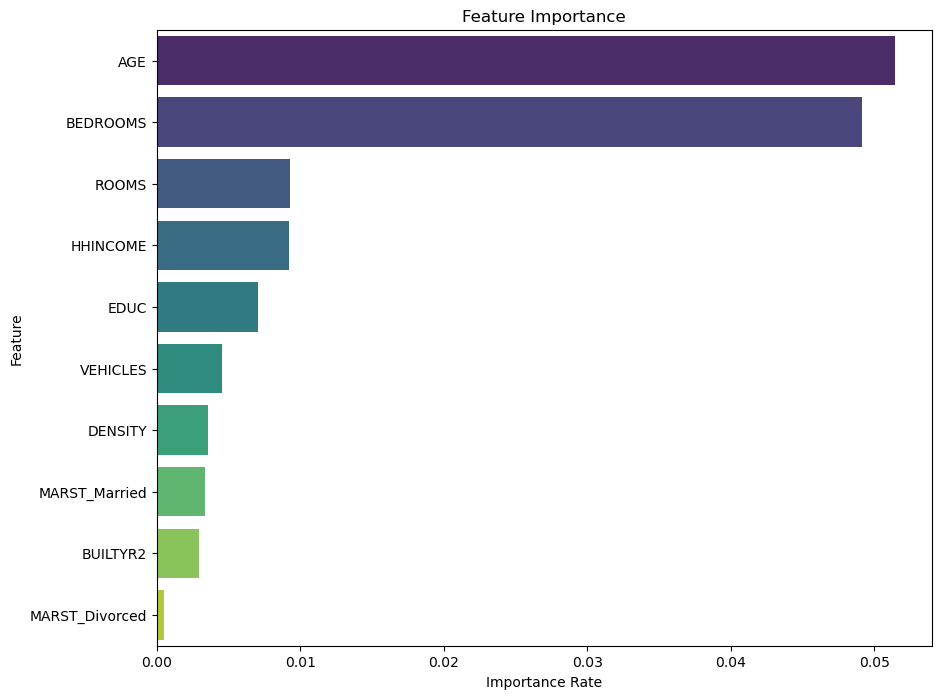

In [24]:
# Compute permutation importance
result = permutation_importance(svm_selected, X_testScaled[:, selected_features], y_test, n_repeats=10, random_state=123)

# Extract feature names
feature_names = X.columns[selected_features]

# Create dataframe to store feature importance
importance_df = pd.DataFrame({'feature': feature_names, 'importance': result.importances_mean})

# Sort dataframe by importance
importance_df = importance_df.sort_values(by='importance', ascending=False).reset_index(drop=True)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Rate')
plt.ylabel('Feature')
plt.show()

In [25]:
X_New = data[['AGE', 'BEDROOMS','ROOMS', 'HHINCOME',  'EDUC', 'VEHICLES','DENSITY', 'MARST_Married', 'BUILTYR2', 'MARST_Divorced']]

 

y_New = data['OWNERSHP']
#spliting the data into train and test
X_trainNew, X_testNew, y_trainNew, y_testNew =  train_test_split(X_New, y_New, train_size = 0.7, test_size = 0.3
                                                 ,random_state = 1)

scaler = StandardScaler().fit(X_trainNew)
X_trainNewScaled = scaler.transform(X_trainNew)
X_testNewScaled = scaler.transform(X_testNew)

In [26]:
X_New.columns

Index(['AGE', 'BEDROOMS', 'ROOMS', 'HHINCOME', 'EDUC', 'VEHICLES', 'DENSITY',
       'MARST_Married', 'BUILTYR2', 'MARST_Divorced'],
      dtype='object')

In [27]:
svm_linear = SVC(C=1, kernel='linear',cache_size=1000, verbose=True, max_iter=1000, random_state=123)
svm_linear.fit(X_trainNewScaled, y_trainNew)


kfold = skm.KFold(5, 
                  random_state=123,
                  shuffle=True)
grid = skm.GridSearchCV(svm_linear,
                        {'C':[0.001,0.01,0.1,1]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')




grid.fit(X_trainNewScaled, y_trainNew)
best_params = grid.best_params_

# Get the best estimator (model) from grid search
best_model = grid.best_estimator_

# Evaluate the best model on the test set
accuracy = best_model.score(X_testNewScaled, y_testNew)

# Print the best parameters and accuracy
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1255.454744, rho = 0.963401
nSV = 1443, nBSV = 1047
Total nSV = 1443
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.999980, rho = 0.009741
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.999901, rho = 0.031846
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.999969, rho = 0.017318
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.999994, rho = 0.005681
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.999904, rho = 0.029604
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter

In [28]:
linear_svc = SVC(kernel='linear', C=1, cache_size=1000, verbose = True, max_iter = 10000, random_state=123)

# Fit the model to the training data
linear_svc.fit(X_trainNewScaled, y_trainNew)

# Evaluate the model on the testing data and print the accuracy score
accuracy = linear_svc.score(X_testNewScaled, y_testNew)
print("Linear SVM with C=1: %.2f%%" % (accuracy * 100))

[LibSVM].........WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -8689.745859, rho = -0.721662
nSV = 8276, nBSV = 7558
Total nSV = 8276
Linear SVM with C=1: 82.86%


In [29]:
accuracy = linear_svc.score(X_trainNewScaled, y_trainNew)
print("Linear SVM with C=1: %.2f%%" % (accuracy * 100))
#since trian and test are close to one another we can say the model is prforming good

Linear SVM with C=1: 82.40%


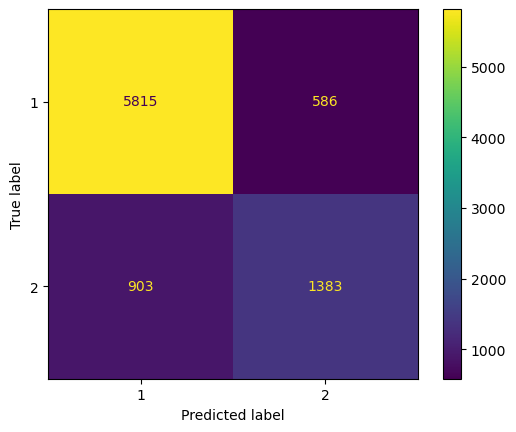

In [30]:
y_hat = linear_svc.predict(X_testNewScaled)
conf = ConfusionMatrixDisplay.from_predictions(y_testNew, y_hat)
conf

In [31]:

X_top = data[['AGE', 'BEDROOMS']]

y = data['OWNERSHP']
#spliting the data into train and test
X_trainTop, X_testTop, y_trainTop, y_testTop =  train_test_split(X_top, y, train_size = 0.7, test_size = 0.3
                                                 ,random_state = 123)

scaler = StandardScaler().fit(X_trainTop)
X_trainScaledTop = scaler.transform(X_trainTop)
X_testScaledTop = scaler.transform(X_testTop)



[LibSVM].........WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -9388.697559, rho = -1.017063
nSV = 8887, nBSV = 8880
Total nSV = 8887


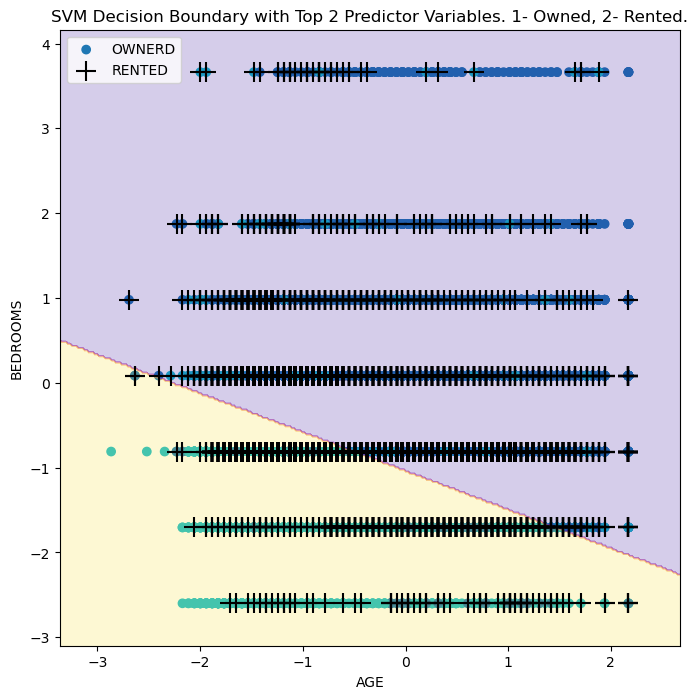

In [32]:
linearsvc_top = SVC(kernel='linear', C=1, cache_size=1000, verbose=True, max_iter=10000, random_state=123)
linearsvc_top.fit(X_trainScaledTop, y_trainTop)

fig, ax = subplots(figsize=(8,8))
plot_svm(X_trainScaledTop,
         y_trainTop,
         linearsvc_top,
         ax=ax)

ax.set_xlabel('AGE')
ax.set_ylabel('BEDROOMS')
plt.title('SVM Decision Boundary with Top 2 Predictor Variables. 1- Owned, 2- Rented.')
class_labels = ['OWNERD', 'RENTED']

# Plot legend
plt.legend(class_labels)

plt.show()




In [33]:
accuracy = linearsvc_top.score(X_testScaledTop, y_testTop)

print(" Test Accuracy top two linear svm model with C=1: {:.2f}%".format(accuracy * 100))
accuracy = linearsvc_top.score(X_trainScaledTop, y_trainTop)
print(" Train Accuracy top two linear svm model with C=1: {:.2f}%".format(accuracy * 100))

 Test Accuracy top two linear svm model with C=1: 81.20%
 Train Accuracy top two linear svm model with C=1: 81.81%


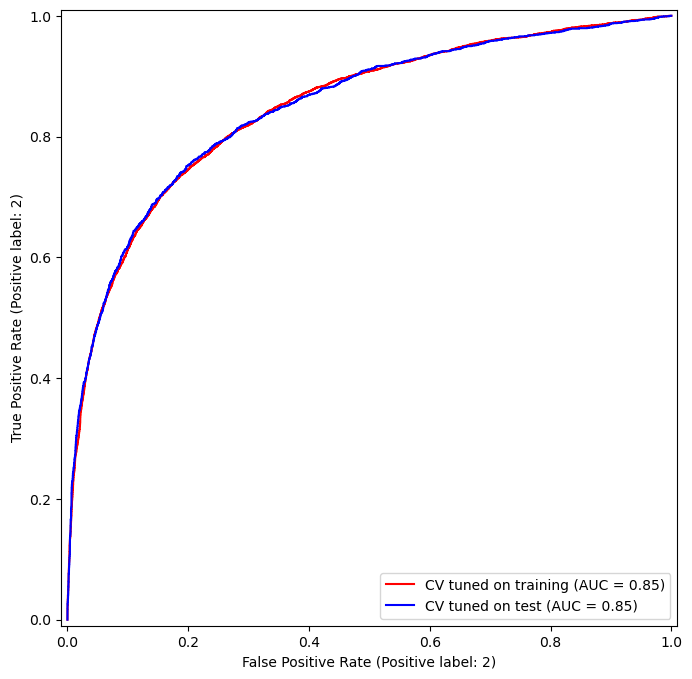

In [34]:

roc_curve = RocCurveDisplay.from_estimator 
fig, ax = subplots(figsize=(8,8))
for (X_, y_, c, name) in zip(
     (X_trainNewScaled, X_testNewScaled),
     (y_train, y_test),
     ('r', 'b'),
     ('CV tuned on training',
      'CV tuned on test')):
    roc_curve(linear_svc,
              X_,
              y_,
              name=name,
              ax=ax,
              color=c)

## Radial

In [35]:
svm_rbf = SVC(kernel="rbf", cache_size=1000, verbose=True, max_iter=10000,gamma=1, C=1, random_state=123)
svm_rbf.fit(X_trainScaled, y_train)


[LibSVM].........WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -6048.254983, rho = -0.566679
nSV = 11924, nBSV = 5043
Total nSV = 11924


SVC(C=1, cache_size=1000, gamma=1, max_iter=10000, random_state=123,
    verbose=True)

In [36]:
kfold = skm.KFold(5, 
                  random_state=123,
                  shuffle=True)
grid = skm.GridSearchCV(svm_rbf,
                        {'C':[0.1,1,10,100,1000],
                         'gamma':[0.5,1,2,3,4]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy');
grid.fit(X_trainScaled, y_train)
grid.best_params_
grid.best_estimator_
best_params = grid.best_params_
best_accuracy = grid.best_score_ * 100

# Print the best parameters and best accuracy
print("Best Parameters:", best_params)
print("Best Accuracy: %.2f%%" % best_accuracy)
#Best Parameters: {'C': 1, 'gamma': 0.5}
#Best Accuracy: 89.03%


[LibSVM]......*...*
optimization finished, #iter = 9198
obj = -679.726776, rho = -0.852574
nSV = 8890, nBSV = 6518
Total nSV = 8890
[LibSVM]......*...*
optimization finished, #iter = 9393
obj = -671.901362, rho = -0.852080
nSV = 8817, nBSV = 6451
Total nSV = 8817
[LibSVM]......*...*
optimization finished, #iter = 9100
obj = -678.113945, rho = -0.844046
nSV = 8849, nBSV = 6554
Total nSV = 8849
[LibSVM]......*...*
optimization finished, #iter = 9219
obj = -670.556911, rho = -0.847589
nSV = 8794, nBSV = 6422
Total nSV = 8794
[LibSVM]......*...*
optimization finished, #iter = 9507
obj = -674.901852, rho = -0.852959
nSV = 8856, nBSV = 6453
Total nSV = 8856
[LibSVM].......*..WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -750.615723, rho = -0.904938
nSV = 11116, nBSV = 6169
Total nSV = 11116
[LibSVM]........*.WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -741.445276, rho = -0.906107
nSV = 11040, nBSV = 6074
Total nSV = 11040


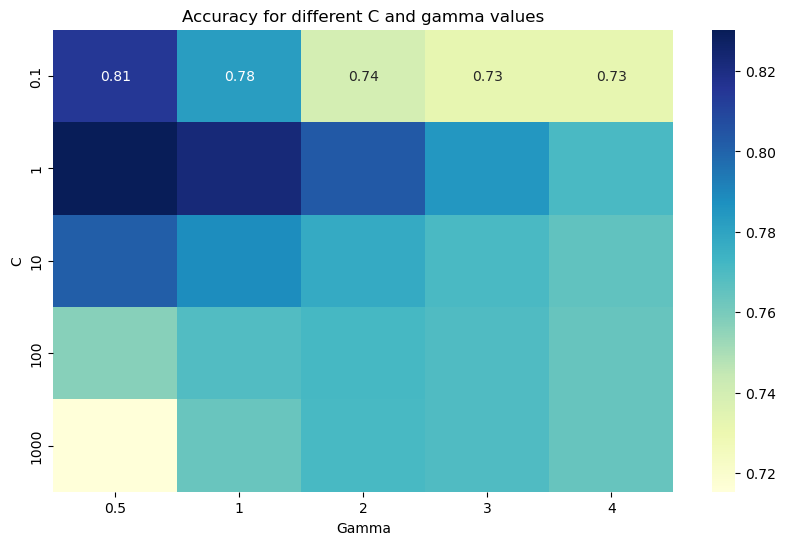

In [37]:
results = grid.cv_results_
mean_test_scores = results['mean_test_score']

# Reshaping the mean test scores to match the grid of C and gamma values
c_values = [0.1, 1, 10, 100, 1000]
gamma_values = [0.5, 1, 2, 3, 4]
mean_test_scores = np.array(mean_test_scores).reshape(len(c_values), len(gamma_values))

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(mean_test_scores, annot=True, cmap="YlGnBu", xticklabels=gamma_values, yticklabels=c_values)
plt.title('Accuracy for different C and gamma values')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()

In [38]:
svm_rbf = SVC(kernel='rbf', cache_size=1000, verbose=True, max_iter=10000,gamma=0.5, C=1, random_state=123)
svm_rbf.fit(X_trainScaled, y_train)


accuracy = svm_rbf.score(X_testScaled, y_test)

print(" Test Accuracy inital svm model with gamma=0.5, C=1: {:.2f}%".format(accuracy * 100))
accuracy = svm_rbf.score(X_trainScaled, y_train)
print(" Train Accuracy inital svm model with gamma=0.5, C=1: {:.2f}%".format(accuracy * 100))

[LibSVM].........WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -6345.542279, rho = -0.566848
nSV = 9912, nBSV = 5609
Total nSV = 9912
 Test Accuracy inital svm model with gamma=0.5, C=1: 83.27%
 Train Accuracy inital svm model with gamma=0.5, C=1: 86.99%


In [39]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=123)

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=rf_classifier, n_features_to_select=10, step=1)
rfe.fit(X_trainScaled, y_train)

# Get selected features
selected_features = np.array(range(X_trainScaled.shape[1]))[rfe.support_]

# Extract feature names
selected_feature_names = X.columns[selected_features]

# Train SVM classifier with selected features
svm_selected_rbf = SVC(kernel='rbf', cache_size=1000, verbose=True, max_iter=10000,gamma=0.5, C=1, random_state=42)
svm_selected_rbf.fit(X_trainScaled[:, selected_features], y_train)

# Evaluate the model on the testing data
accuracy = svm_selected_rbf.score(X_testScaled[:, selected_features], y_test)
print("Accuracy with selected features: {:.2f}%".format(accuracy * 100))

# Print important features
print("Important Features:")
for feature in selected_feature_names:
    print(feature)

[LibSVM].........WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -6360.249132, rho = -0.564190
nSV = 9891, nBSV = 5597
Total nSV = 9891
Accuracy with selected features: 83.30%
Important Features:
DENSITY
HHINCOME
ROOMS
BUILTYR2
BEDROOMS
VEHICLES
AGE
EDUC
MARST_Married
MARST_Single


In [40]:
accuracy_rbf = svm_selected_rbf.score(X_trainScaled[:, selected_features], y_train)
print("Accuracy with selected features: {:.2f}%".format(accuracy_rbf * 100))
#the accuracy of the train is not much higher than the test which is a good sign 


Accuracy with selected features: 86.98%


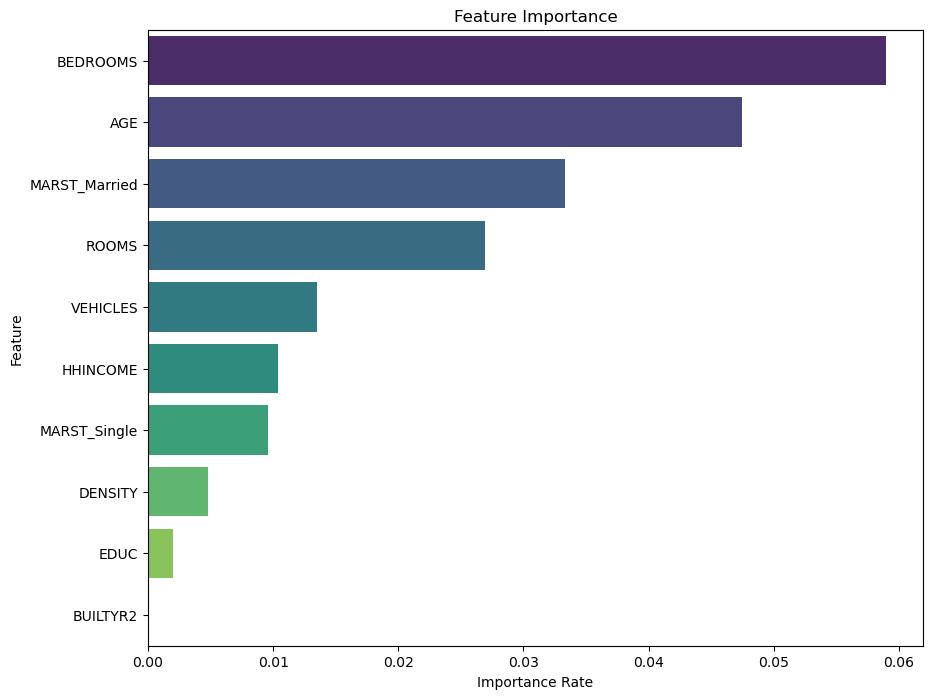

In [41]:
# Compute permutation importance
result_rbf = permutation_importance(svm_selected_rbf, X_testScaled[:, selected_features], y_test, n_repeats=10, random_state=123)

# Extract feature names
feature_names = selected_feature_names

# Create dataframe to store feature importance
importance_df = pd.DataFrame({'feature': feature_names, 'importance': result_rbf.importances_mean})

# Sort dataframe by importance
importance_df = importance_df.sort_values(by='importance', ascending=False).reset_index(drop=True)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Rate')
plt.ylabel('Feature')
plt.show()

In [42]:
data.columns

Index(['DENSITY', 'OWNERSHP', 'HHINCOME', 'ROOMS', 'BUILTYR2', 'BEDROOMS',
       'VEHICLES', 'AGE', 'EDUC', 'MARST_Divorced', 'MARST_Married',
       'MARST_Single'],
      dtype='object')

In [43]:
X_rbf = data[['BEDROOMS','AGE','MARST_Married','ROOMS', 'VEHICLES','HHINCOME','MARST_Single','DENSITY', 'EDUC',  'BUILTYR2']]
X_trainRbf, X_testRbf, y_trainRbf, y_testRbf =  train_test_split(X_rbf, y, train_size = 0.7, test_size = 0.3
                                                 ,random_state = 123)

scaler = StandardScaler().fit(X_trainRbf)
X_trainRbfScaled = scaler.transform(X_trainRbf)
X_testRbfScaled = scaler.transform(X_testRbf)

In [90]:
svm_rbf=SVC(kernel='rbf', cache_size=1000, verbose=True, max_iter=10000,gamma=0.5, C=1, random_state=42)
svm_rbf.fit(X_trainRbfScaled, y_trainRbf)


kfold = skm.KFold(5, 
                  random_state=123,
                  shuffle=True)
grid = skm.GridSearchCV(svm_rbf,
                        {'C':[0.1,1,10,100,1000],
                         'gamma':[0.5,1,2,3,4]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')



grid.fit(X_trainRbfScaled, y_trainRbf)
grid.best_params_
grid.best_params_
grid.best_estimator_
best_params = grid.best_params_
best_accuracy = grid.best_score_ * 100

# Print the best parameters and best accuracy
print("Best Parameters:", best_params)
print("Best Accuracy: %.2f%%" % best_accuracy)
#it is reported that {'C': 0.1, 'gamma': 0.5} gives the best parameters for this set off data Best Accuracy: 88.73%

[LibSVM].........WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -6258.434236, rho = -0.561973
nSV = 9751, nBSV = 5501
Total nSV = 9751
[LibSVM]......*..*
optimization finished, #iter = 8674
obj = -662.065934, rho = -0.841611
nSV = 8627, nBSV = 6406
Total nSV = 8627
[LibSVM]......*...*
optimization finished, #iter = 9007
obj = -665.447137, rho = -0.852162
nSV = 8712, nBSV = 6390
Total nSV = 8712
[LibSVM]......*..*
optimization finished, #iter = 8780
obj = -663.487293, rho = -0.840536
nSV = 8676, nBSV = 6440
Total nSV = 8676
[LibSVM]......*..*
optimization finished, #iter = 8780
obj = -659.987759, rho = -0.838976
nSV = 8619, nBSV = 6381
Total nSV = 8619
[LibSVM]......*..*
optimization finished, #iter = 8667
obj = -663.626553, rho = -0.841418
nSV = 8662, nBSV = 6438
Total nSV = 8662
[LibSVM].......*..WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -739.271207, rho = -0.902923
nSV = 10944, nBSV = 6052
Total nSV = 10944
[LibSV

In [91]:
radial_svc = SVC(kernel='rbf', cache_size=1000, verbose=True, max_iter=1,gamma=0.5, C=1, random_state=123)

# Fit the model to the training data
radial_svc.fit(X_trainRbfScaled, y_trainRbf)

# Evaluate the model on the testing data and print the accuracy score
accuracy = radial_svc.score(X_testRbfScaled, y_testRbf)
print("radial SVM with C=0.1 gamma=0.5 on test set : %.2f%%" % (accuracy * 100))
accuracy = radial_svc.score(X_trainRbfScaled, y_trainRbf)
print("radial SVM with C=0.1 gamma=0.5 on train set: %.2f%%" % (accuracy * 100))
#if i do a grid search on the new dataset it gives me c 10 and gamma 0.5 and shows signs of overfitting on the data but if i just use the old c 1 then the results are better
#the test acc is at 76% and the train acc is at 87%

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1
obj = -1.604703, rho = -0.056790
nSV = 2, nBSV = 2
Total nSV = 2
radial SVM with C=0.1 gamma=0.5 on test set : 69.69%
radial SVM with C=0.1 gamma=0.5 on train set: 68.57%


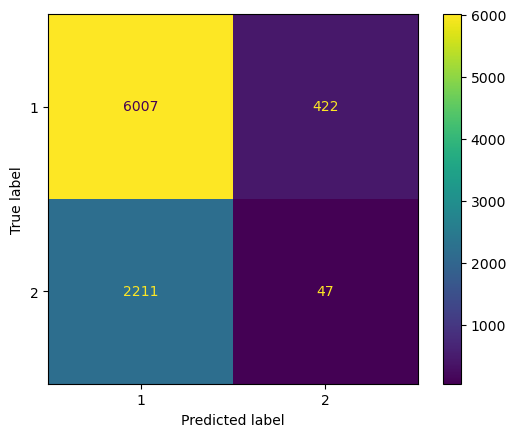

In [92]:
y_hat = radial_svc.predict(X_testRbfScaled)
conf = ConfusionMatrixDisplay.from_predictions(y_testRbf, y_hat)
conf
#non of the renters are being predicted based on the radial model

[LibSVM].........WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -7142.128120, rho = -0.278422
nSV = 7552, nBSV = 7276
Total nSV = 7552


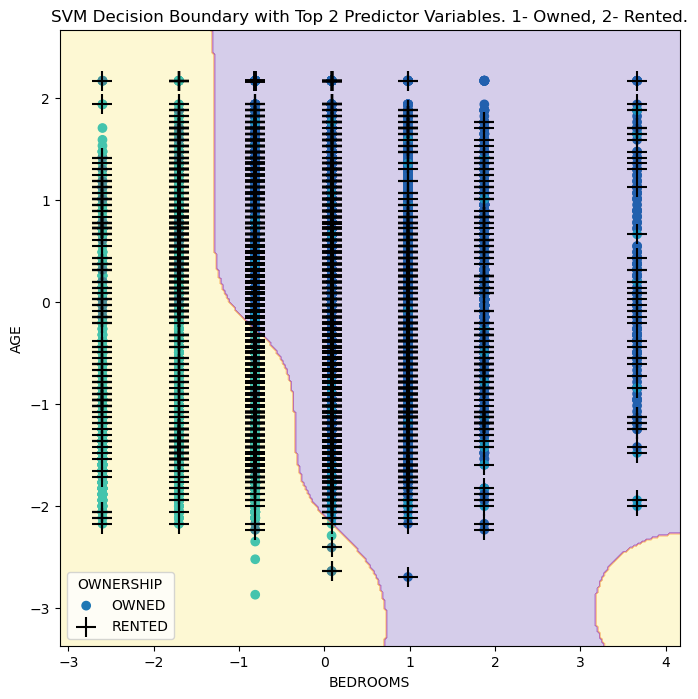

In [93]:

X_top2 = data[['BEDROOMS', 'AGE']]


#spliting the data into train and test
X_trainTop2, X_testTop2, y_trainTop2, y_testTop2 =  train_test_split(X_top2, y, train_size = 0.7, test_size = 0.3
                                                 ,random_state = 123)

scaler = StandardScaler().fit(X_trainTop2)
X_trainScaled_Top = scaler.transform(X_trainTop2)
X_testScaled_Top = scaler.transform(X_testTop2)


radialsvc_top = SVC(kernel='rbf', cache_size=1000, verbose=True, max_iter=10000,gamma=0.5, C=1, random_state=123)
radialsvc_top.fit(X_trainScaled_Top, y_trainTop2)

fig, ax = subplots(figsize=(8,8))
plot_svm(X_trainScaled_Top,
         y_trainTop2,
         radialsvc_top,
         ax=ax)
ax.set_xlabel('BEDROOMS')
ax.set_ylabel('AGE')
plt.title('SVM Decision Boundary with Top 2 Predictor Variables. 1- Owned, 2- Rented.')
# Add legend with colors
class_labels = ['OWNED', 'RENTED']

# Plot legend
plt.legend(class_labels, title='OWNERSHIP')

plt.show()


In [75]:
accuracy = radialsvc_top.score(X_testScaled_Top, y_test)
print("radial SVM top two with gamma=0.5, C=1 on test set : %.2f%%" % (accuracy * 100))
accuracy =radialsvc_top.score(X_trainScaled_Top, y_train)
print("radial SVM top two with gamma=0.5, C=1 on train set: %.2f%%" % (accuracy * 100))

#the acc of test is increasing but the acc of train is decreasing when takeing the subset of the 2 best predictors

radial SVM top two with gamma=0.5, C=1 on test set : 78.90%
radial SVM top two with gamma=0.5, C=1 on train set: 80.09%


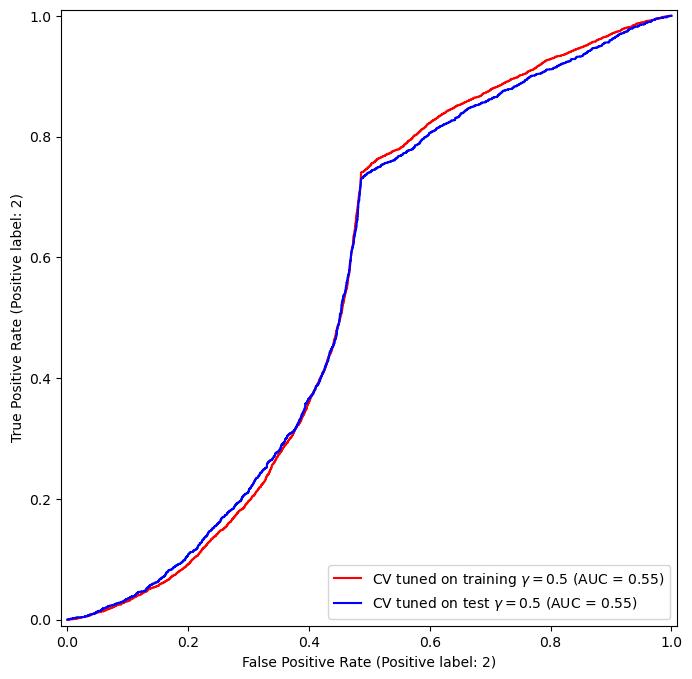

In [94]:
fig, ax = subplots(figsize=(8,8))
for (X_, y_, c, name) in zip(
     (X_trainRbfScaled, X_testRbfScaled),
     (y_trainRbf, y_testRbf),
     ('r', 'b'),
     ('CV tuned on training $\gamma=0.5$',
      'CV tuned on test $\gamma=0.5$')):
    roc_curve(radial_svc,
          X_,
          y_,
          name= name,
          color=c,
          ax=ax)
fig;


## Polynomial

In [50]:
svm_poly = SVC(kernel="poly", cache_size=1000, verbose=True, max_iter=10000,degree=2, C=1, random_state=123)
svm_poly.fit(X_trainScaled, y_train)

[LibSVM].........WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -10061.096346, rho = -1.193615
nSV = 10005, nBSV = 9671
Total nSV = 10005


SVC(C=1, cache_size=1000, degree=2, kernel='poly', max_iter=10000,
    random_state=123, verbose=True)

In [51]:
kfold = skm.KFold(5, 
                  random_state=123,
                  shuffle=True)
grid = skm.GridSearchCV(svm_poly,
                        {'C':[0.1,1,10,100,1000],
                         'degree':[2,3,4,5]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy');
grid.fit(X_trainScaled, y_train)
grid.best_params_
grid.best_estimator_
best_params = grid.best_params_
best_accuracy = grid.best_score_ * 100

# Print the best parameters and best accuracy
print("Best Parameters:", best_params)
print("Best Accuracy: %.2f%%" % best_accuracy)
#Best Parameters: {'C': 1, 'degree': 4}
#Best Accuracy: 82.69%

[LibSVM]......
*.
*.
*.*.*
optimization finished, #iter = 9086
obj = -802.704182, rho = -1.318261
nSV = 8121, nBSV = 8060
Total nSV = 8121
[LibSVM]......
*.
*
optimization finished, #iter = 7749
obj = -792.498820, rho = -1.296460
nSV = 8015, nBSV = 7956
Total nSV = 8015
[LibSVM].....
*.
*.
*
optimization finished, #iter = 7102
obj = -794.493028, rho = -1.343599
nSV = 8039, nBSV = 7977
Total nSV = 8039
[LibSVM]......
*.
**.*
optimization finished, #iter = 7780
obj = -787.506770, rho = -1.353615
nSV = 7966, nBSV = 7906
Total nSV = 7966
[LibSVM]......
*.
*.*
optimization finished, #iter = 8182
obj = -795.714063, rho = -1.339359
nSV = 8047, nBSV = 7986
Total nSV = 8047
[LibSVM]......
*.
*...WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -657.628061, rho = -1.016814
nSV = 6801, nBSV = 6652
Total nSV = 6801
[LibSVM].....
*.
*..*
optimization finished, #iter = 8406
obj = -651.380084, rho = -1.015057
nSV = 6736, nBSV = 6600
Total nSV = 6736
[LibSVM].....
*..*..

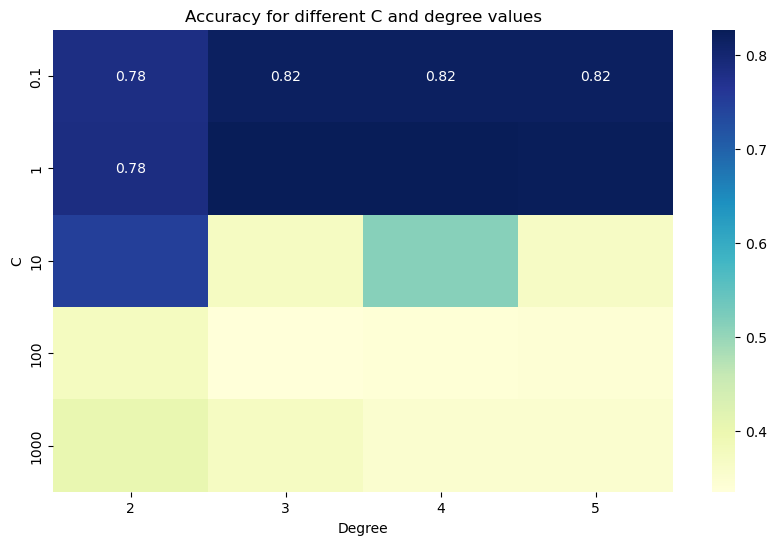

In [52]:
degree_values = [2, 3, 4, 5]  
results = grid.cv_results_

# Extracting the mean test scores
mean_test_scores = results['mean_test_score']

# Reshaping the mean test scores to match the grid of C and degree values
mean_test_scores = np.array(mean_test_scores).reshape(len(c_values), len(degree_values))

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(mean_test_scores, annot=True, cmap="YlGnBu", xticklabels=degree_values, yticklabels=c_values)
plt.title('Accuracy for different C and degree values')
plt.xlabel('Degree')
plt.ylabel('C')
plt.show()

In [53]:
svm_poly = SVC(kernel='poly', cache_size=1000, verbose=True, max_iter=10000,degree=4, C=1, random_state=123)
svm_poly.fit(X_trainScaled, y_train)


accuracy = svm_poly.score(X_testScaled, y_test)

print(" Test Accuracy inital svm model with degree=4, C=1: {:.2f}%".format(accuracy * 100))
accuracy = svm_poly.score(X_trainScaled, y_train)
print(" Train Accuracy inital svm model with degree=4, C=1: {:.2f}%".format(accuracy * 100))

[LibSVM].........WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -7096.213754, rho = -0.679235
nSV = 8015, nBSV = 7239
Total nSV = 8015
 Test Accuracy inital svm model with degree=4, C=1: 82.78%
 Train Accuracy inital svm model with degree=4, C=1: 84.09%


In [54]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=123)

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=rf_classifier, n_features_to_select=10, step=1)
rfe.fit(X_trainScaled, y_train)

# Get selected features
selected_features = np.array(range(X_trainScaled.shape[1]))[rfe.support_]

# Extract feature names
selected_feature_names = X.columns[selected_features]

# Train SVM classifier with selected features
svm_selected_poly = SVC(kernel='poly', cache_size=1000, verbose=True, max_iter=10000,degree=3, C=1, random_state=42)
svm_selected_poly.fit(X_trainScaled[:, selected_features], y_train)

# Evaluate the model on the testing data
accuracy_poly_test= svm_selected_poly.score(X_testScaled[:, selected_features], y_test)
print("Accuracy with selected features: {:.2f}%".format(accuracy * 100))

# Print important features
print("Important Features:")
for feature in selected_feature_names:
    print(feature)

[LibSVM].........WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -7639.729117, rho = -0.878277
nSV = 8218, nBSV = 7698
Total nSV = 8218
Accuracy with selected features: 84.09%
Important Features:
DENSITY
HHINCOME
ROOMS
BUILTYR2
BEDROOMS
VEHICLES
AGE
EDUC
MARST_Married
MARST_Single


In [55]:
accuracy_poly_train = svm_selected_poly.score(X_trainScaled[:, selected_features], y_train)
print("Accuracy with selected features: {:.2f}%".format(accuracy_rbf * 100))

Accuracy with selected features: 86.98%


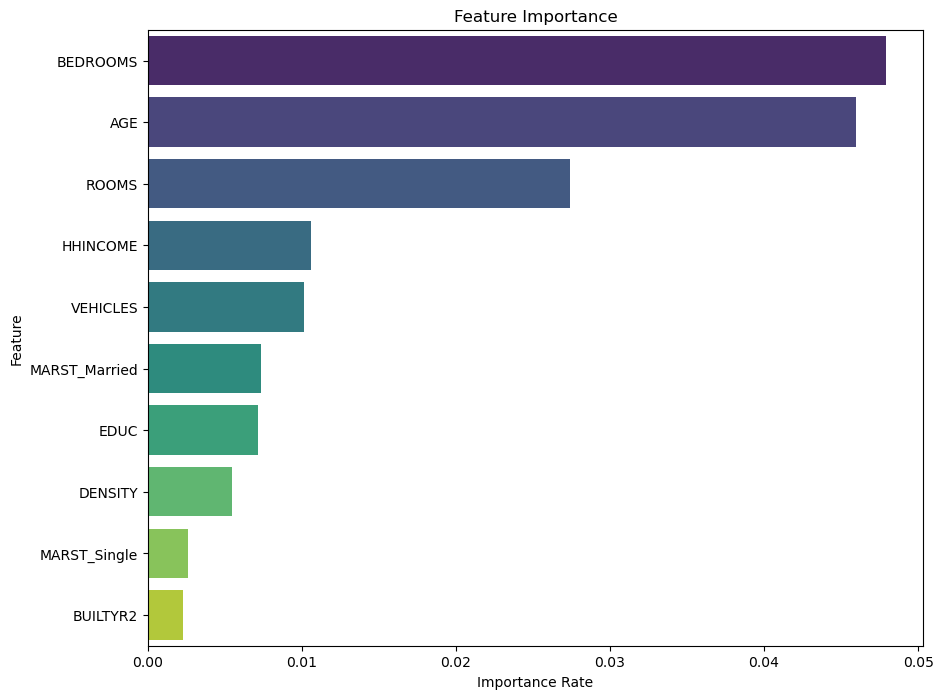

In [56]:
# Compute permutation importance
result_poly = permutation_importance(svm_selected_poly, X_testScaled[:, selected_features], y_test, n_repeats=10, random_state=123)

# Extract feature names
feature_names = selected_feature_names

# Create dataframe to store feature importance
importance_df = pd.DataFrame({'feature': feature_names, 'importance': result_poly.importances_mean})

# Sort dataframe by importance
importance_df = importance_df.sort_values(by='importance', ascending=False).reset_index(drop=True)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Rate')
plt.ylabel('Feature')
plt.show()

['BEDROOMS', 'AGE','ROOMS', 'HHINCOME', 'VEHICLES', 'MARST_Married', 'EDUC', 'DENSITY', 'MARST_Single', 'BUILTYR2']

In [57]:
X_poly = data[['BEDROOMS', 'AGE','ROOMS', 'HHINCOME', 'VEHICLES', 'MARST_Married', 'EDUC', 'DENSITY', 'MARST_Single', 'BUILTYR2']]
X_trainPoly, X_testPoly, y_train, y_test =  train_test_split(X_poly, y, train_size = 0.7, test_size = 0.3
                                                 ,random_state = 123)

scaler = StandardScaler().fit(X_trainPoly)
X_trainPolyScaled = scaler.transform(X_trainPoly)
X_testPolyScaled = scaler.transform(X_testPoly)

In [58]:
svm_poly=SVC(kernel='poly', cache_size=1000, verbose=True, max_iter=10000,degree=4, C=1, random_state=123)
svm_poly.fit(X_trainPolyScaled, y_train)


kfold = skm.KFold(5, 
                  random_state=123,
                  shuffle=True)
grid = skm.GridSearchCV(svm_poly,
                        {'C':[0.1,1,10,100,1000],
                         'degree':[2,3,4,5]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')



grid.fit(X_trainPolyScaled, y_train)
grid.best_params_
grid.best_params_
grid.best_estimator_
best_params = grid.best_params_
best_accuracy = grid.best_score_ * 100

# Print the best parameters and best accuracy
print("Best Parameters:", best_params)
print("Best Accuracy: %.2f%%" % best_accuracy)

#Best Parameters: {'C': 1, 'degree': 3}
#Best Accuracy: 82.94%

[LibSVM].........WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -7194.937869, rho = -0.819202
nSV = 8212, nBSV = 7377
Total nSV = 8212
[LibSVM]......
**.
*
optimization finished, #iter = 7658
obj = -790.261160, rho = -1.326292
nSV = 8019, nBSV = 7961
Total nSV = 8019
[LibSVM]......
*.
*.
*.*
optimization finished, #iter = 8509
obj = -792.337863, rho = -1.316296
nSV = 8042, nBSV = 7983
Total nSV = 8042
[LibSVM]......
*.
**.
*
optimization finished, #iter = 7754
obj = -797.868079, rho = -1.327273
nSV = 8088, nBSV = 8044
Total nSV = 8088
[LibSVM]......
*.
*
optimization finished, #iter = 7577
obj = -794.151007, rho = -1.321898
nSV = 8066, nBSV = 8008
Total nSV = 8066
[LibSVM]......
*.*.*
optimization finished, #iter = 7549
obj = -800.300595, rho = -1.324212
nSV = 8119, nBSV = 8064
Total nSV = 8119
[LibSVM]......
*..
*..WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -646.716082, rho = -1.010333
nSV = 6670, nBSV = 6556
Total 

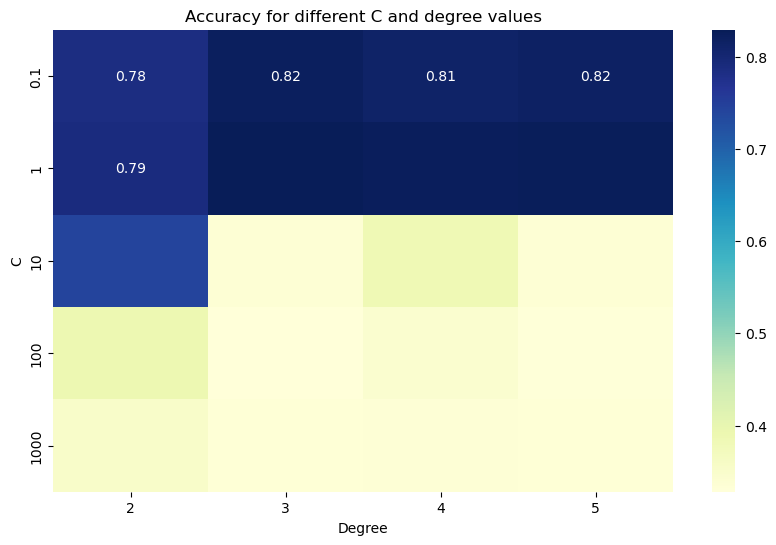

In [59]:
# Extracting the grid search results
results = grid.cv_results_

# Extracting the mean test scores
mean_test_scores = results['mean_test_score']

# Reshaping the mean test scores to match the grid of C and degree values
mean_test_scores = np.array(mean_test_scores).reshape(len(c_values), len(degree_values))

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(mean_test_scores, annot=True, cmap="YlGnBu", xticklabels=degree_values, yticklabels=c_values)
plt.title('Accuracy for different C and degree values')
plt.xlabel('Degree')
plt.ylabel('C')
plt.show()


In [89]:
poly_svc = SVC(kernel='poly', cache_size=1000, verbose=True, max_iter=10000,degree=4, C=1, random_state=123)

# Fit the model to the training data
poly_svc.fit(X_trainPolyScaled, y_train)

# Evaluate the model on the testing data and print the accuracy score
accuracy = poly_svc.score(X_testPolyScaled, y_test)
print("poly SVM with C=1 and degree=4 on test set : %.2f%%" % (accuracy * 100))
accuracy = poly_svc.score(X_trainPolyScaled, y_train)
print("poly SVM with C=1 and degree= 4 on train set: %.2f%%" % (accuracy * 100))
#the train and test is almost the same 

[LibSVM].........WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -7194.937869, rho = -0.819202
nSV = 8212, nBSV = 7377
Total nSV = 8212
poly SVM with C=1 and degree=4 on test set : 81.93%
poly SVM with C=1 and degree= 4 on train set: 83.63%


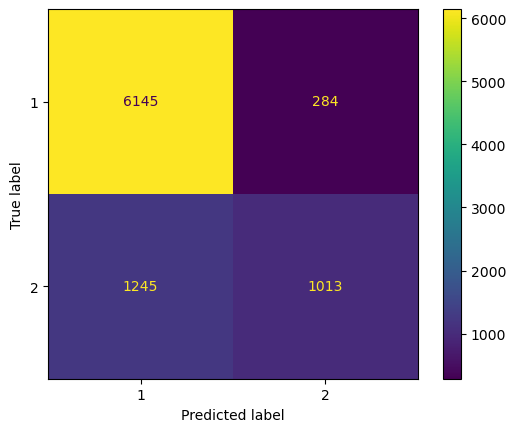

In [78]:
y_hat = poly_svc.predict(X_testPolyScaled)
conf = ConfusionMatrixDisplay.from_predictions(y_test, y_hat)
conf

In [79]:
X_top_poly = data[['BEDROOMS', 'AGE']]


#spliting the data into train and test
X_trainTop_poly, X_testTop_poly, y_train, y_test =  train_test_split(X_top_poly, y, train_size = 0.7, test_size = 0.3
                                                 ,random_state = 123)
scaler = StandardScaler().fit(X_trainTop_poly)
X_trainScaled_Top_poly = scaler.transform(X_trainTop_poly)
X_testScaled_Top_poly = scaler.transform(X_testTop_poly)


[LibSVM].........WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -8716.465174, rho = -0.515067
nSV = 8657, nBSV = 8413
Total nSV = 8657


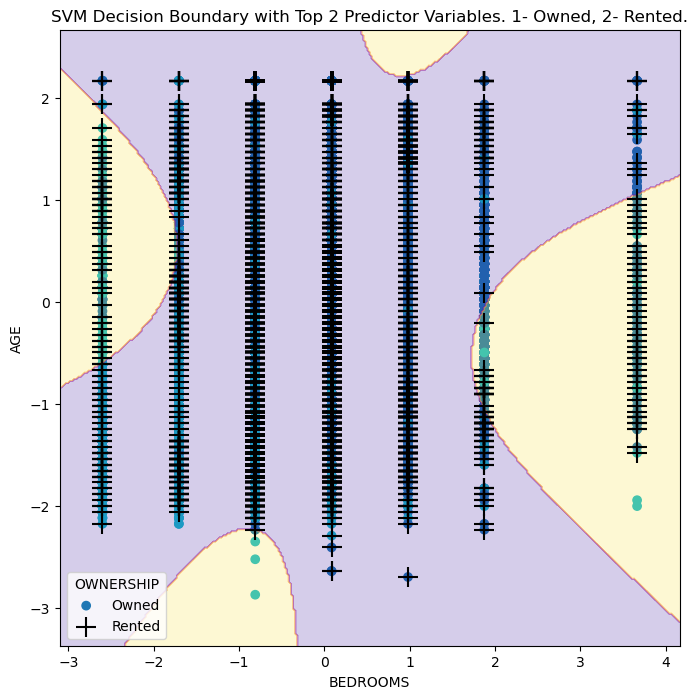

In [83]:

polysvc_top = SVC(kernel='poly', cache_size=1000, verbose=True, max_iter=10000, degree=4, C=1, random_state=123)
polysvc_top.fit(X_trainScaled_Top_poly, y_train)

fig, ax = plt.subplots(figsize=(8,8))
plot_svm(X_trainScaled_Top_poly, y_train, polysvc_top, ax=ax)
ax.set_xlabel('BEDROOMS')
ax.set_ylabel('AGE')
plt.title('SVM Decision Boundary with Top 2 Predictor Variables. 1- Owned, 2- Rented.')

# Add legend
class_labels = ['Owned', 'Rented']
plt.legend(class_labels, title='OWNERSHIP')

plt.show()


In [87]:
accuracy = polysvc_top.score(X_testScaled_Top_poly, y_test)
print("Polynomial SVM top two with degree=4, C=1 on test set : %.2f%%" % (accuracy * 100))
accuracy =polysvc_top.score(X_trainScaled_Top_poly, y_train)
print("Polynomial SVM top two with degree=4, C=1 on train set: %.2f%%" % (accuracy * 100))


Polynomial SVM top two with degree=4, C=1 on test set : 71.85%
Polynomial SVM top two with degree=4, C=1 on train set: 71.33%


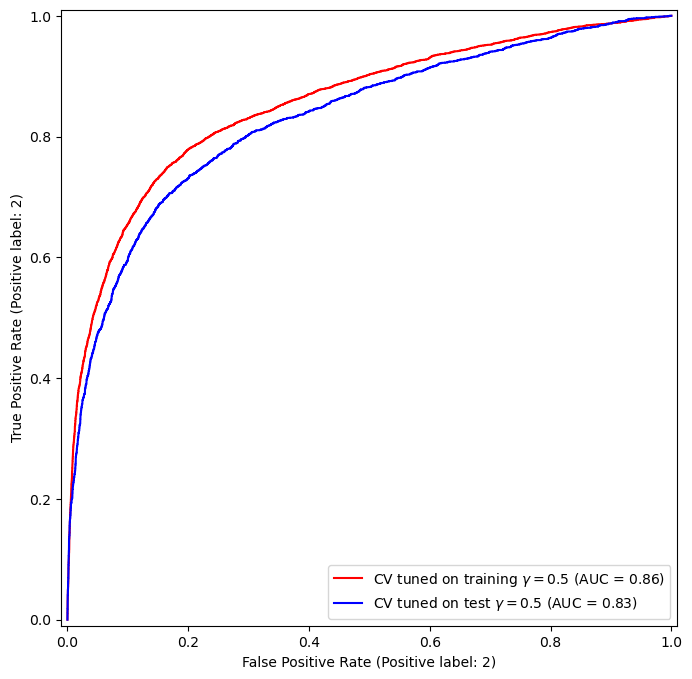

In [85]:
fig, ax = subplots(figsize=(8,8))
for (X_, y_, c, name) in zip(
     (X_trainPolyScaled, X_testPolyScaled),
     (y_train, y_test),
     ('r', 'b'),
     ('CV tuned on training $\gamma=0.5$',
      'CV tuned on test $\gamma=0.5$')):
    roc_curve(poly_svc,
          X_,
          y_,
          name= name,
          color=c,
          ax=ax)
fig;

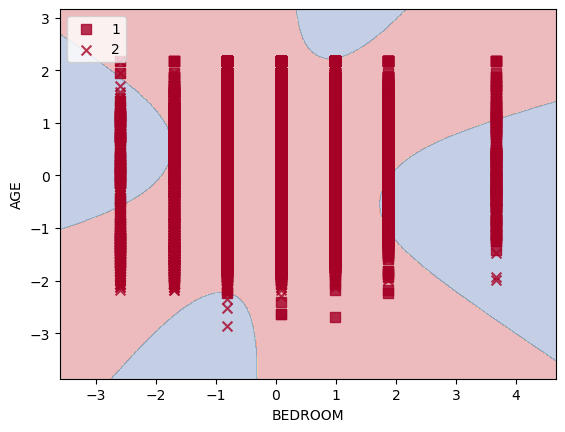

In [66]:

def plot_decision_regions(X, y, classifier, resolution=0.01):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = plt.cm.RdYlBu

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)],
                    marker=markers[idx], label=cl, s=50)  # Increase marker size

# Example usage:
# Assuming X_train and y_train are your training data
# and classifier is your trained classifier (e.g., SVM model)

plot_decision_regions(X_trainScaled_Top_poly, y_train, polysvc_top)
plt.xlabel('BEDROOM')
plt.ylabel('AGE')
plt.legend(loc='upper left')
plt.show()
